# Task 4: Conceptual Questions


## Q1. What is entropy and information gain?

○ Entropy is a measure of impurity or randomness in a dataset.

Entropy(S)=− i=1 ∑n pi log2 (pi)

○ Information Gain is the reduction in entropy after splitting a dataset based on a feature.

Information gain(IG) = Entropy(parent) - ∑(child/parent * Entropy(child))

## Q2. Explain the difference between Gini Index and Entropy.

Aspect	Gini-Index	Entropy

Range :  0 (pure) to 0.5 (binary split)	0 (pure) to 1 (binary split)

Computation:	Simpler, faster	Slightly more complex (involves log)

Used by:	CART algorithm,	ID3, C4.5

Preference:	Prefers larger class purity faster	More sensitive to class impurity

## Q3. How can a decision tree overfit? How can this be avoided?

How it overfits:

A. Grows too deep and captures noise in the training data.

B. Makes overly specific rules that do not generalize to unseen data.

How to avoid overfitting:

A. Pruning: Remove nodes that don't improve accuracy (post- or pre-pruning)

B. Max Depth: Limit the depth of the tree

# Task 5: Decision Tree on Titanic Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

● Load Titanic dataset (or use a similar dataset).

In [4]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


● Preprocess (handle missing values, encode categorical variables).

In [5]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10144\2380699926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10144\2380699926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

● Train a DecisionTreeClassifier.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

● Visualize the decision tree using plot_tree.

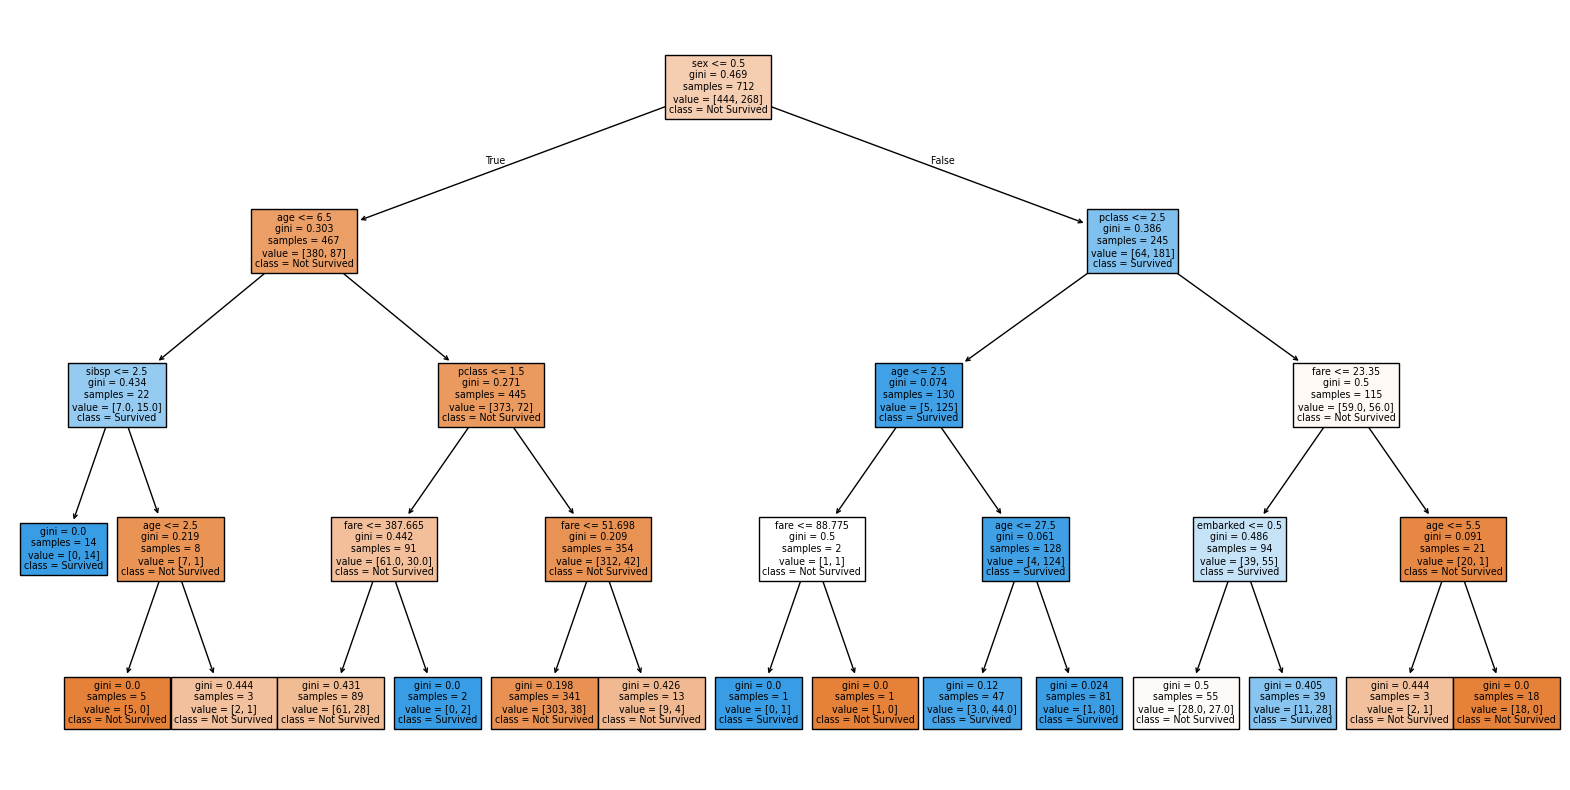

In [8]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


● Evaluate the model using accuracy and confusion matrix.

In [9]:
y_pred = dt.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[96  9]
 [27 47]]


# Task 6: Model Tuning



In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [11]:
train_accuracies = []
test_accuracies = []
depths = range(1, 21)

● Use parameters like:

○ max_depth


In [12]:
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=5, random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

○ min_samples_split

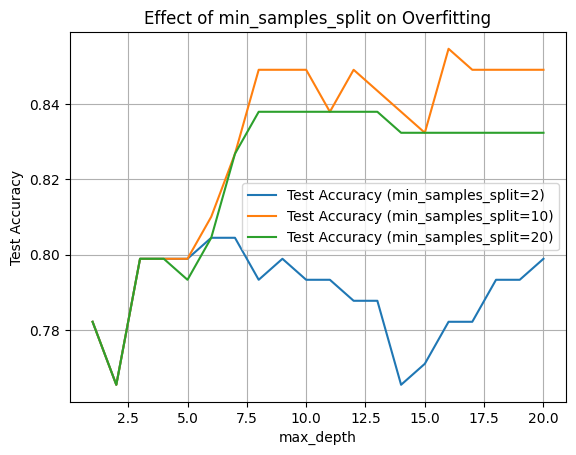

In [13]:
min_samples = [2, 10, 20]
for m in min_samples:
    train_accs = []
    test_accs = []
    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d, min_samples_split=m, random_state=42)
        clf.fit(X_train, y_train)
        train_accs.append(clf.score(X_train, y_train))
        test_accs.append(clf.score(X_test, y_test))
    
    plt.plot(depths, test_accs, label=f'Test Accuracy (min_samples_split={m})')

plt.xlabel('max_depth')
plt.ylabel('Test Accuracy')
plt.title('Effect of min_samples_split on Overfitting')
plt.legend()
plt.grid(True)
plt.show()


● Show how performance changes.

In [14]:
#Training accuracy increases with max_depth (possibly reaching 1.0).

#Testing accuracy initially increases, then drops → classic sign of overfitting.

#Using a higher min_samples_split helps reduce overfitting by preventing small splits.

● Plot training vs testing accuracy to visualize overfitting.

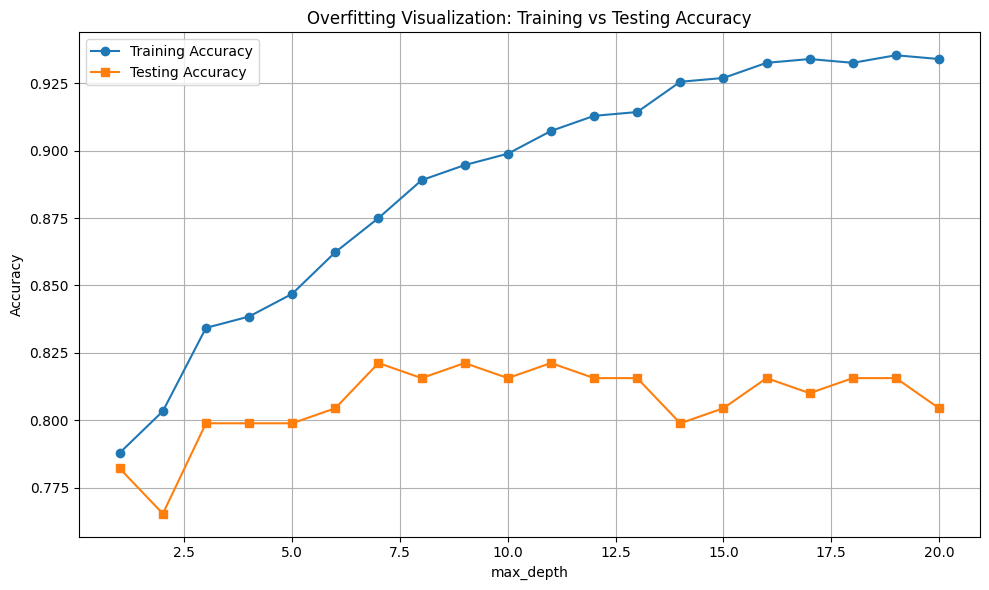

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Visualization: Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
